# House Rent Prediction

## Objective :

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [2]:
dataset = pd.read_csv("House_rent_unclean.csv")

### Data Pre-Processing

In [3]:
# Delete the unnamed column which is unnecessary is there in database
dataset.drop("Unnamed: 0",inplace=True,axis=1)

### Exploratory Data Analysis

In [4]:
# checking the data in dataset
dataset.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [5]:
# Checking the count of the types in every dimension
dataset.count()

seller_type      192688
bedroom          192809
layout_type      192997
property_type    192500
locality         193011
price            192264
area             192012
furnish_type     192933
bathroom         192827
city             192665
dtype: int64

#### Cheking for unique values

In [23]:
# cheking seller type categories
pd.unique(dataset["seller_type"])

array(['OWNER', 'AGENT', nan, 'BUILDER'], dtype=object)

In [24]:
# Checking for bedroom categories
pd.unique(dataset["bedroom"])

array([ 2.,  1.,  3.,  4.,  5., nan,  6., 10.,  7.,  8., 15.,  9., 12.,
       14., 11.])

In [26]:
# checking for layout_type
pd.unique(dataset["layout_type"])

array(['BHK', 'RK', nan], dtype=object)

In [35]:
# cheking for property type
pd.unique(dataset["property_type"])

array(['Apartment', 'Studio Apartment', 'Independent House',
       'Independent Floor', 'Villa', nan, 'Penthouse'], dtype=object)

In [36]:
# checking for locality type
pd.unique(dataset["locality"])

array(['Bodakdev', 'CG Road', 'Jodhpur', ..., 'Renuka Nagar',
       'Gananjay Society', 'Aundh Gaon'], dtype=object)

In [37]:
# checking for the furnish type
pd.unique(dataset["furnish_type"])

array(['Furnished', 'Semi-Furnished', 'Unfurnished', nan], dtype=object)

In [38]:
# checking for the bathroom
pd.unique(dataset["bathroom"])

array([ 2.,  1.,  3.,  4.,  5., nan,  6., 12.,  7.,  8., 15.,  9., 18.,
       19., 10., 16., 14.])

In [39]:
# checking for the city
pd.unique(dataset["city"])

array(['Ahmedabad', nan, 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Pune'], dtype=object)

#### Checking for Null Values

In [51]:
dataset.isna().sum()

seller_type      323
bedroom          202
layout_type       14
property_type    511
locality           0
price            747
area             999
furnish_type      78
bathroom         184
city             346
dtype: int64

#### Handling NaN Values

In [68]:
# Calculating with mode values
dataset.mode()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,AGENT,2.0,BHK,Apartment,Thane West,15000.0,1200.0,Semi-Furnished,2.0,Mumbai


In [73]:
# Replace all the values with mode values of every dimension
values = {"seller_type": "AGENT", "bedroom": 2.0, "layout_type": "BHK", "property_type":"Apartment","locality":"Thane West","price":1200.0,"area":1200.0,"furnish_type":"Semi-Furnished","bathroom":2.0,"city":"Mumbai"}
dataset.fillna(inplace=True,value=values)
dataset.isna().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
city             0
dtype: int64

#### Data Types and Dimension Checking

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    192688 non-null  object 
 1   bedroom        192809 non-null  float64
 2   layout_type    192997 non-null  object 
 3   property_type  192500 non-null  object 
 4   locality       193011 non-null  object 
 5   price          192264 non-null  float64
 6   area           192012 non-null  float64
 7   furnish_type   192933 non-null  object 
 8   bathroom       192827 non-null  float64
 9   city           192665 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


#### Covariance and Correlation 

In [7]:
dataset.cov()

/tmp/ipykernel_18028/1846944379.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.cov()


,bedroom,price,area,bathroom
bedroom,0.915785,4.633925e+04,7.872244e+02,0.783388
price,46339.250958,8.460257e+09,7.258410e+07,45948.455599
area,787.224421,7.258410e+07,1.089761e+06,759.516841
bathroom,0.783388,4.594846e+04,7.595168e+02,0.873835


In [8]:
dataset.corr()

/tmp/ipykernel_18028/2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,bedroom,price,area,bathroom
bedroom,1.000000,0.526280,0.787951,0.875688
price,0.526280,1.000000,0.756775,0.534310
area,0.787951,0.756775,1.000000,0.778227
bathroom,0.875688,0.534310,0.778227,1.000000


#### Analysis Visualization using Seaborn

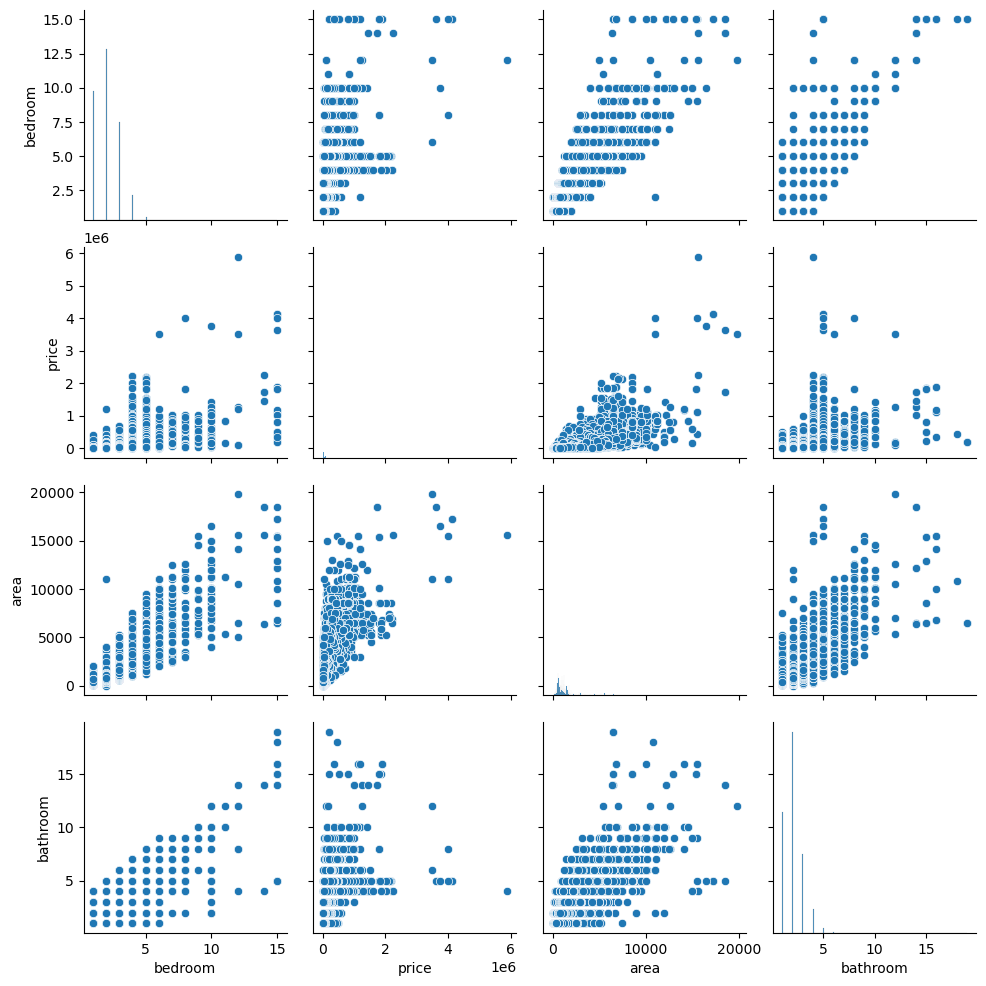

In [9]:
sns.pairplot(dataset)